In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from google.colab import drive
drive.mount('/content/drive')
dataset = loadmat('/content/drive/MyDrive/face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

y[y==-1] = 0  # use 0/1 for labels instead of -1/+1
X = np.hstack((np.ones((n,1)), X))  # append a column of ones
q = np.shape(y)[1] #number of classification problems

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 1a
def logsig(_x):
    return 1/(1+np.exp(-_x))

def train(num):
    
    Xb = X[num]
    Y = y[num]
    n, p = np.shape(Xb)
    ## initial weights
    V = np.random.randn(M+1, 1)
    W = np.random.randn(p, M)

    err_l=[]
    
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V) 
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V - alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*X[[i],:].T@delta
            V = Vnew
            W = Wnew
        #print('epoch: ', epoch)
    ## Final predicted labels (on training data)
        H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
        Yhat = logsig(H@V)
        err_l.append(np.mean(abs(np.round(Yhat[:,0])-Y[:,0])))
    return err_l, W, V

def test(tn, W, V):
    Xt = X[tn]
    yt = y[tn]
    nt, _ = np.shape(Xt)
    
    H = logsig(np.hstack((np.ones((nt,1)), Xt@W)))
    Yhat = logsig(H@V)
    return np.mean(abs(np.round(Yhat[:,0])-yt[:,0]))
    

Text(0.5, 0, 'epochs')

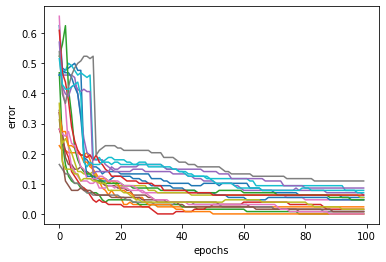

In [3]:
# 1b
M = 32 #number of hidden nodes
alpha = 0.05 #step size
L = 100 #number of epochs
for i in range(20):
    err,_,_ = train(list(range(n)))
    plt.plot(err)
plt.ylabel('error')
plt.xlabel('epochs')

finally approximate 0% error rate

In [4]:
# 1c
from sklearn.model_selection import KFold
kf = KFold(8)
for j in range(10):
  accuracy = []
  for train_i, test_i in kf.split(X):
    err, W, V = train(train_i)
    e = test(test_i, W, V)
    accuracy.append(e)
  print(j, np.mean(accuracy))


0 0.171875
1 0.1484375
2 0.109375
3 0.125
4 0.15625
5 0.1328125
6 0.109375
7 0.09375
8 0.1171875
9 0.09375


No it cannot achieve the perfect accuracy

In [5]:
# 2a
def train_2(num,sigma,lamda):
  Xb = X[num]
  Y = y[num]
  n, p = np.shape(Xb)
  distaq = np.zeros((n,n),dtype=float)
  for i in range(0,n):
    for j in range(0,n):
      d = np.linalg.norm(Xb[i,:]-Xb[j,:])
      distaq[i,j]=d**2
  K=np.exp(-distaq/(2*sigma**2))
  alpha = np.linalg.inv(K+lamda*np.identity(n))@Y
  Yhat = np.sign(K@alpha)
  err = np.mean(Y!=Yhat)
  return err, alpha
def test_2(tr,ts,alpha,sigma):
  Xtr = X[tr]
  Xts = X[ts]
  Ytr = y[tr]
  Yts = y[ts]
  ntr,_ = np.shape(alpha)
  nts,_ = np.shape(Xts)
  distaq = np.zeros((nts,ntr),dtype=float)
  for i in range(0,nts):
    for j in range(0,ntr):
      d = np.linalg.norm(Xts[i,:]-Xtr[j,:])
      distaq[i,j]=d**2
  K=(np.exp(-distaq/(2*sigma**2)))
  Yhat = np.sign(K@alpha)
  err = np.mean(Yts!=Yhat)
  return err

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'sigma')

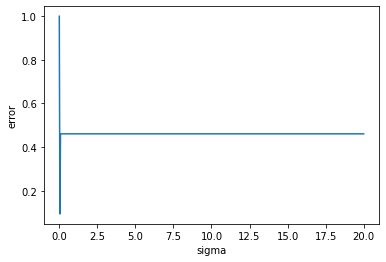

In [6]:
# 2b
n,_ = np.shape(X)
lamda = 0.5
err=[]
sigma_array = np.linspace(0,20,500)
for sigma in sigma_array:
      err_i,_= train_2(list(range(n)),sigma,lamda)
      err.append(err_i)
plt.plot(sigma_array,err)
plt.ylabel('error')
plt.xlabel('sigma')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


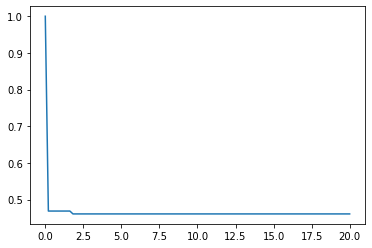

In [7]:
# 2c
kf = KFold(8)
sigma_array = np.linspace(0,20,100)
err=[]
for sigma in sigma_array:
  accuracy = []
  for train_i, test_i in kf.split(X):
    e, alpha = train_2(train_i,sigma,lamda)
    ets = test_2(train_i,test_i,alpha,sigma)
    accuracy.append(ets)
  err.append(np.mean(accuracy))
plt.plot(sigma_array, err)


In [8]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/mendota_secchi_depth.txt', delimiter='\t')
x = df['day_of_year']
y = df['secchi_depth']

In [10]:
print(np.shape(x))

(30,)


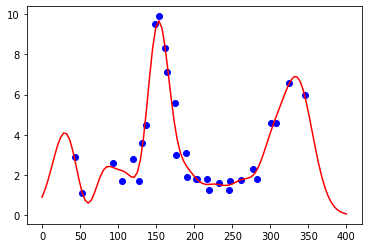

In [12]:
n=30
p=100
sigma = 20
lamda = 0.01
xts = np.linspace(0,400,p)
distaq = np.zeros((n,n),dtype=float)
for i in range(0,n):
  for j in range(0,n):
    distaq[i,j]=(x[i]-x[j])**2
K=np.exp(-distaq/(2*sigma**2))
alpha = np.linalg.inv(K+lamda*np.identity(n))@y
distaqts = np.zeros((p,n),dtype=float)
for i in range(0,p):
  for j in range(0,n):
    distaqts[i,j]=(xts[i]-x[j])**2
dts = np.exp(-distaqts/(2*sigma**2))@alpha
plt.plot(x,y,'bo',label='Measured Data')
plt.plot(xts,dts,'r',label='Kernel Fit')

just like 1c and 2c use kfold 8 times repeat and compare to get the realtionship betweeen two variables.